## Going to start off by testing Facenet's embeddings

In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from facenet.src import facenet
import os
import sys
import math

In [2]:
# Choose your seed
seed = 1
#Obtain dataset
dataset_path = "~/Desktop/Datasets/lfw/lfw_mtcnnpy_160"
dataset = facenet.get_dataset(dataset_path)

In [3]:
# Check that there are at least one training image per class
for cls in dataset:
    assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')

<ipython-input-3-d498427f77dd>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')


In [4]:
# Extract and show data stats
paths, labels = facenet.get_image_paths_and_labels(dataset)
print('Number of classes: %d' % len(dataset))
print('Number of images: %d' % len(paths))

Number of classes: 5749
Number of images: 13233


### Results of current model being used
Model directory: /home/prudhvi/Desktop/Models/tf/Facenet/20180402-114759  
Metagraph file: model-20180402-114759.meta  
Checkpoint file: model-20180402-114759.ckpt-275  
Runnning forward pass on LFW images  
........................  
Accuracy: 0.99550+-0.00342  
Validation rate: 0.98600+-0.00975 @ FAR=0.00100  
Area Under Curve (AUC): 1.000  
Equal Error Rate (EER): 0.004  

Model structure:
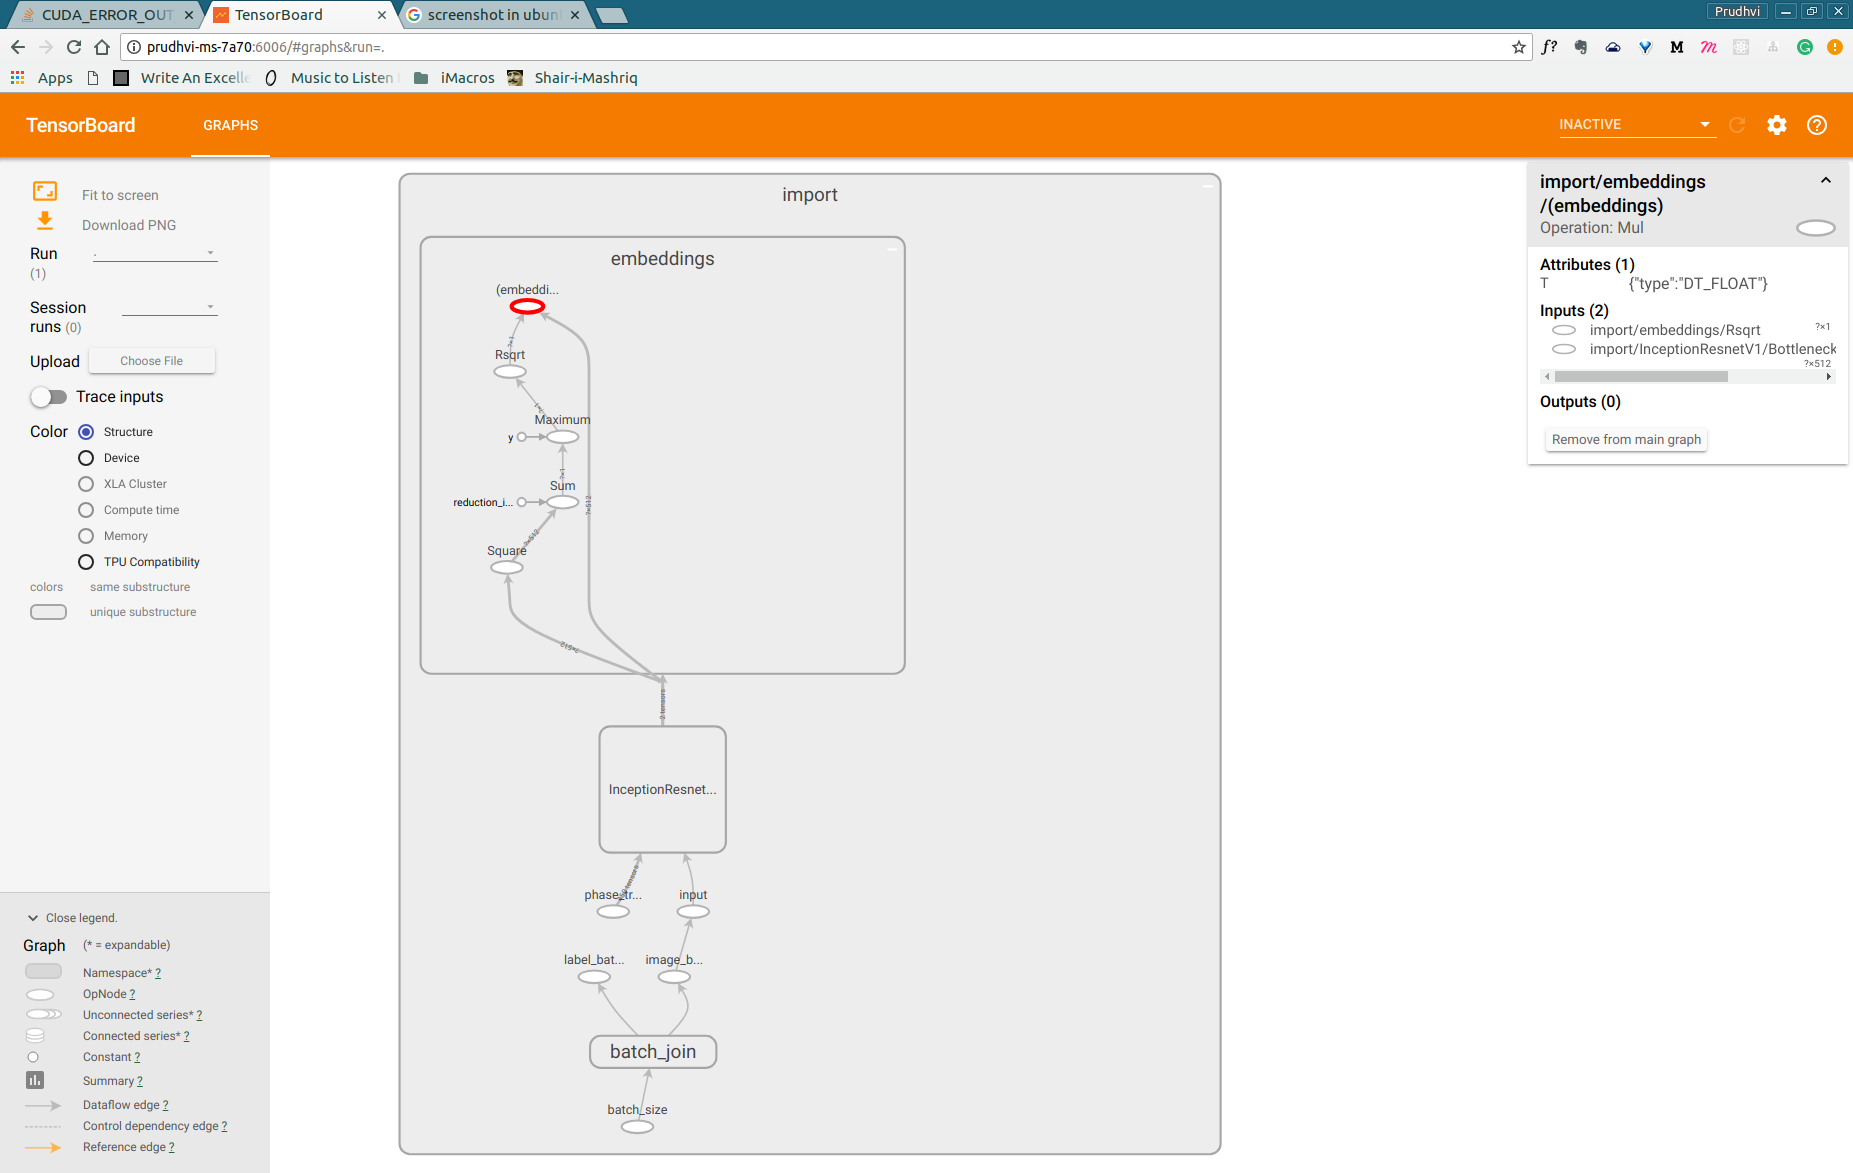

In [22]:
def get_face_embeddings(image_size = 160,batch_size = 64):
    with tf.Graph().as_default():
      
        with tf.Session() as sess:
            
            np.random.seed(seed=1)
            
            # Load the model
            print('Loading feature extraction model')
            model_path = '/home/prudhvi/Desktop/Models/tf/Facenet/20180402-114759'
            facenet.load_model(model_path)
            
            # Get input and output tensors
            images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
            embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
            phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
            embedding_size = embeddings.get_shape()[1]
            print("embedding size", embedding_size)
            
             # Run forward pass to calculate embeddings
            print('Calculating features for images')
            nrof_images = len(paths)
            nrof_batches_per_epoch = int(math.ceil(1.0*nrof_images / batch_size))
            emb_array = np.zeros((nrof_images, embedding_size))
            print("Number of epochs", nrof_batches_per_epoch)
            for i in range(nrof_batches_per_epoch):
                start_index = i*batch_size
                end_index = min((i+1)*batch_size, nrof_images)
                paths_batch = paths[start_index:end_index]
                images = facenet.load_data(paths_batch, False, False, image_size)
                # Whats a phase train placeholder??
                feed_dict = { images_placeholder:images, phase_train_placeholder:False }
                emb_array[start_index:end_index,:] = sess.run(embeddings, feed_dict=feed_dict)
            
            return emb_array

In [23]:
face_emb = get_face_embeddings()
print(face_emb.shape)

Loading feature extraction model
Model directory: /home/prudhvi/Desktop/Models/tf/Facenet/20180402-114759
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from /home/prudhvi/Desktop/Models/tf/Facenet/20180402-114759/model-20180402-114759.ckpt-275
embedding size 512
Calculating features for images
(13233, 512)


In [25]:
print(face_emb[3])

[ 7.25630447e-02 -9.20067541e-03 -7.29891425e-03 -7.52814114e-02
 -5.64651145e-03  4.91331751e-03  7.52614206e-03  4.74578142e-02
 -6.39672130e-02  1.82094593e-02 -4.80585508e-02  6.52763098e-02
 -4.26634140e-02  1.60996225e-02 -3.12378127e-02 -1.82045959e-02
  7.09078982e-02 -3.42732780e-02  1.81496646e-02 -7.51084834e-02
  5.17141446e-02 -7.80089274e-02  2.26187613e-02  3.13906148e-02
  1.13397306e-02 -4.37321048e-03  4.84869666e-02  8.25680513e-03
 -2.79435329e-02 -1.02045210e-02  2.52711034e-04 -9.10849348e-02
  1.39493048e-02  7.56968111e-02 -1.07583283e-02 -8.79011825e-02
 -9.46614593e-02 -3.57907265e-02 -3.49283405e-02 -1.25217419e-02
 -3.00361253e-02 -2.79826554e-03  1.75334848e-02  8.64605531e-02
  1.71859208e-02  5.99686615e-02 -4.01103199e-02 -3.31829712e-02
 -1.82442963e-02 -1.69946887e-02 -4.70628478e-02  8.31081718e-02
  6.84327632e-02 -3.37431184e-03 -3.53498533e-02 -2.11632457e-02
 -1.64721475e-03  2.19478738e-02 -2.80647762e-02  3.24850120e-02
 -7.30698183e-02  3.04717